In [116]:
import pandas as pd

# HIERARCHIAL

In [117]:
df =pd.read_excel("EastWestAirlines.xlsx",sheet_name='data')

In [118]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [154]:
df.shape

(3999, 12)

In [119]:
def norm_func(i):                              #Did normalisation in order to remove biasness in different columns.
    x=(i-i.min())/(i.max()-i.min())
    return x

In [120]:
df_norm=norm_func(df.iloc[:,1:])

In [121]:
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [122]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

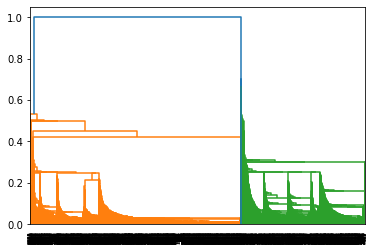

In [95]:
dendrogram = sch.dendrogram(sch.linkage(df_norm,method="single"))  #this is the reason why hierarchial clustering is not practical as it takes a lot of time.

In [123]:
model = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='single')

In [124]:
model = model.fit_predict(df_norm)

In [125]:
Cluster = pd.DataFrame(model,columns=['clusters'])

In [126]:
Cluster

,clusters
0,1
1,1
2,1
3,1
4,0
...,...
3994,0
3995,0
3996,0
3997,1


In [127]:
df_final=pd.concat([df,Cluster], axis=1)

In [128]:
df_final

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


## Kmeans Clustering

In [140]:
from sklearn.cluster import KMeans

In [141]:
model=KMeans(n_clusters=3)

In [142]:
model.fit_predict(df_norm)

array([2, 2, 2, ..., 1, 2, 2], dtype=int32)

In [144]:
model.labels_

array([2, 2, 2, ..., 1, 2, 2], dtype=int32)

In [145]:
Clusters = pd.DataFrame(model.labels_,columns=['cluster'])

In [146]:
df_final = pd.concat([df,Clusters],axis=1)

In [147]:
df_final

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2


## DBscan

In [161]:
from sklearn.cluster import DBSCAN

In [170]:
model = DBSCAN(eps=0.5,min_samples=1500)

In [171]:
model.fit_predict(df_norm)

array([ 0,  0,  0, ..., -1,  0,  0])

In [172]:
model.labels_

array([ 0,  0,  0, ..., -1,  0,  0])

In [173]:
Cluster = pd.DataFrame(model.labels_,columns=['cluster'])

In [174]:
df_final = pd.concat([df,Cluster],axis=1)

In [175]:
df_final

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,-1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,-1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,-1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0
